In [1]:
from espuma import Case_Directory, Boundary_Probe
import matplotlib.pyplot as plt

In [2]:
of_case = Case_Directory("_column_case")
prb = Boundary_Probe(of_case, of_case.system.boundaryProbes)
data = prb.array_data

espuma_BoundaryProbes already exists :)


In [3]:
data

<xarray.Dataset> Size: 1MB
Dimensions:   (probes: 2, time: 8840)
Coordinates:
  * probes    (probes) object 16B Point(x=0.0, y=0.0, z=0.0) Point(x=0.0, y=0...
  * time      (time) float64 71kB 0.07 0.14 0.21 ... 1.614e+05 1.62e+05
Data variables:
    bez_aq    (probes, time) float64 141kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    dcf_aq    (probes, time) float64 141kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    genx_aq   (probes, time) float64 141kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    pfba_aq   (probes, time) float64 141kB 1.467e-10 1.168e-09 ... 1.032e-06
    pfhxa_aq  (probes, time) float64 141kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    pfhxs_aq  (probes, time) float64 141kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    pfoa_aq   (probes, time) float64 141kB 2.168e-10 1.359e-09 ... 1.525e-06

In [4]:
data.time

<xarray.DataArray 'time' (time: 8840)> Size: 71kB
array([7.000000e-02, 1.400000e-01, 2.100000e-01, ..., 1.607999e+05,
       1.614000e+05, 1.620000e+05], shape=(8840,))
Coordinates:
  * time     (time) float64 71kB 0.07 0.14 0.21 ... 1.608e+05 1.614e+05 1.62e+05

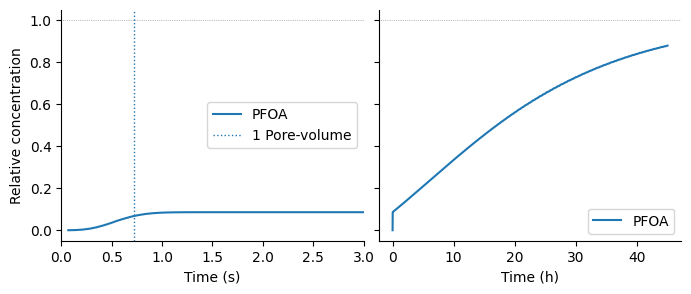

In [5]:
v = data["pfoa_aq"]
rel_conc = v.isel(probes=0) / v.isel(probes=1)
t_hours = data.time / 3600

fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True, gridspec_kw={"wspace": 0.05})

ax = axs[0]
ax.plot(data.time, rel_conc, label="PFOA")
ax.set_ylabel("Relative concentration")
ax.set_xlabel("Time (s)")
ax.set_xlim(left=0, right=3)
ax.axvline(0.7197, label="1 Pore-volume", ls="dotted", lw=1)

ax = axs[1]
ax.plot(t_hours, rel_conc, label="PFOA")
ax.set_xlabel("Time (h)")
# ax.set_xlim(left=-0.0025, right=0.0025)

for ax in axs:
    ax.axhline(1, color="gray", ls="dotted", lw=0.5)
    ax.legend()
    ax.spines.top.set_visible(False)
    ax.spines.right.set_visible(False)

plt.show()